In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
def Mu_Hesaplama(image, kernel_size=11, sigma=5):                   # Luminance is measured by averaging over all the pixel values.
    
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

In [19]:
def Varyans_Hesaplama(image, mu, kernel_size=11, sigma=5):         # It is measured by taking the standard deviation (square root of variance) of all the pixel values.
    
    image_diff = image - mu
    image_diff_sq = image_diff ** 2
    variance = cv2.GaussianBlur(image_diff_sq, (kernel_size, kernel_size), sigma)
    return variance

In [20]:
def StdSapma_Hesaplama(image, mu, kernel_size=11, sigma=5): # It is measured by taking the standard deviation (square root of variance) of all the pixel values.
    
    variance = Varyans_Hesaplama(image, mu, kernel_size, sigma)
    stddev = np.sqrt(variance)
    return stddev

In [21]:
def Kovaryans_Hesaplama(image1, image2, mu1, mu2, kernel_size=11, sigma=5):
    
    image1_diff = image1 - mu1
    image2_diff = image2 - mu2
    covariance = cv2.GaussianBlur(image1_diff * image2_diff, (kernel_size, kernel_size), sigma)
    return covariance

In [22]:
def luminance(mu1, mu2, C1):
    return (2 * mu1 * mu2 + C1) / (mu1**2 + mu2**2 + C1)

In [23]:
def contrast(stddev1, stddev2, C2):
    return (2 * stddev1 * stddev2 + C2) / (stddev1**2 + stddev2**2 + C2)

In [24]:
def structure(covariance, stddev1, stddev2, C3):
    return (covariance + C3) / (stddev1 * stddev2 + C3)

In [25]:
def ssim(image1, image2, K1=0.01, K2=0.03, L=255): # L dinamik bir sabit.
   
    C1 = (K1 * L) ** 2 # Sabit sayı.
    C2 = (K2 * L) ** 2 # Sabit sayı.
    C3 = C2 / 2
    
    kernel_size = 11
    sigma = 5
    
    mu1 = Mu_Hesaplama(image1, kernel_size, sigma)
    mu2 = Mu_Hesaplama(image2, kernel_size, sigma)
    
    stddev1 = StdSapma_Hesaplama(image1, mu1, kernel_size, sigma)
    stddev2 = StdSapma_Hesaplama(image2, mu2, kernel_size, sigma)
    covariance = Kovaryans_Hesaplama(image1, image2, mu1, mu2, kernel_size, sigma)
    
    luminance_value = luminance(mu1, mu2, C1)
    contrast_value = contrast(stddev1, stddev2, C2)
    structure_value = structure(covariance, stddev1, stddev2, C3)
    
    ssim_map = luminance_value * contrast_value * structure_value
    ssim_deger = ssim_map.mean()
    
    return ssim_deger

In [26]:
image1o = cv2.imread("panda.jpeg")
image2o = cv2.imread("Lenna.jpeg")

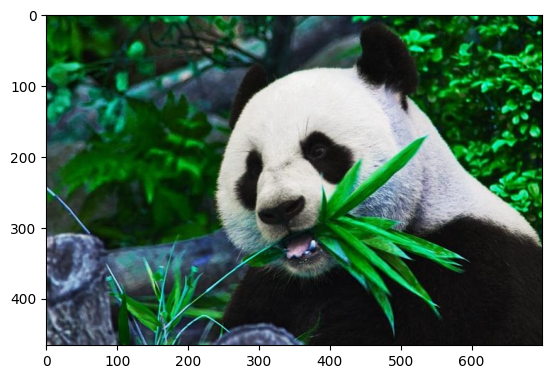

In [27]:
plt.imshow(image1o)
plt.show()

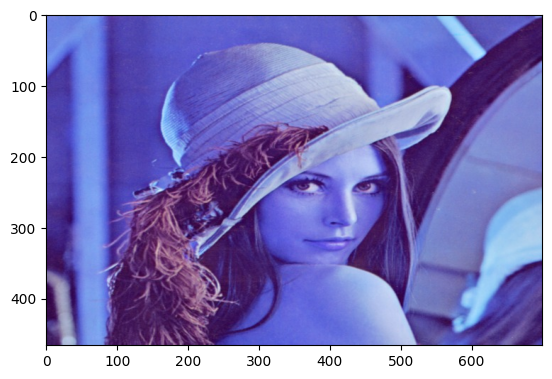

In [28]:
plt.imshow(image2o)
plt.show()

In [29]:
image1 = cv2.cvtColor(image1o, cv2.COLOR_BGR2GRAY).astype(np.float32)
image2 = cv2.cvtColor(image2o, cv2.COLOR_BGR2GRAY).astype(np.float32)

In [30]:
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions")

In [31]:
ssim_deger = ssim(image1, image2)
print("SSIM Benzerlik Orani: % {:.3f}".format(ssim_deger*100))


SSIM Benzerlik Orani: % 21.056


In [32]:
cv2.waitKey(0)
cv2.destroyAllWindows()